<a href="https://colab.research.google.com/github/PsorTheDoctor/robotics/blob/main/notebooks/cuboid_icp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Iterative closest point

In [1]:
!git clone https://github.com/ClayFlannigan/icp.git
%cd icp/

Cloning into 'icp'...
remote: Enumerating objects: 52, done.
remote: Total 52 (delta 0), reused 0 (delta 0), pack-reused 52
Unpacking objects: 100% (52/52), done.
/content/icp


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
from math import *
import os

import icp
import test

In [3]:
test.test_best_fit()

best fit time: 0.000529


In [4]:
test.test_icp()

icp time: 0.00597


In [5]:
def randomize_cuboid(a, b, h, density=1000):
  points = []

  for _ in range(density):
    wall = random.randint(1, 6)
    x = random.random() * a
    y = random.random() * h
    z = random.random() * b

    if wall == 1:
      points.append([x, y, 0])
    elif wall == 2:
      points.append([x, y, b])
    elif wall == 3:
      points.append([x, 0, z])
    elif wall == 4:
      points.append([x, h, z])
    elif wall == 5:
      points.append([0, y, z])
    elif wall == 6:
      points.append([a, y, z])

  return np.array(points)

In [44]:
def plot_scatter(voxels):
  fig = plt.figure(figsize=(16, 9))
  ax = Axes3D(fig)

  x_values = voxels[:, 0]
  y_values = voxels[:, 1]
  z_values = voxels[:, 2]
  ax.scatter(x_values, y_values, z_values)
  # plt.show()
  return fig

def plot_both_scatters(A, B):
  fig = plt.figure(figsize=(16, 9))
  ax = Axes3D(fig)

  x_A = A[:, 0]
  y_A = A[:, 1]
  z_A = A[:, 2]
  x_B = B[:, 0]
  y_B = B[:, 1]
  z_B = B[:, 2]
  ax.scatter(x_A, y_A, z_A, c='b')
  ax.scatter(x_B, y_B, z_B, c='r')
  # plt.show()
  return fig

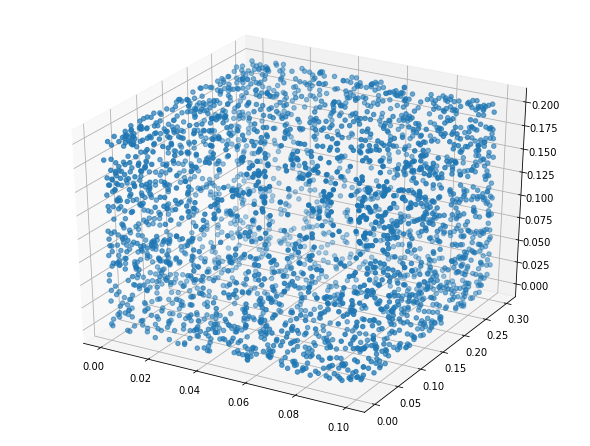

In [56]:
density = 3000
dim = 3
translation = 0.1
rotation = 0.1

A = randomize_cuboid(0.1, 0.2, 0.3, density=density)

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
ax.scatter(A[:, 0], A[:, 1], A[:, 2])
# ax.set_axis_off()
plt.show()

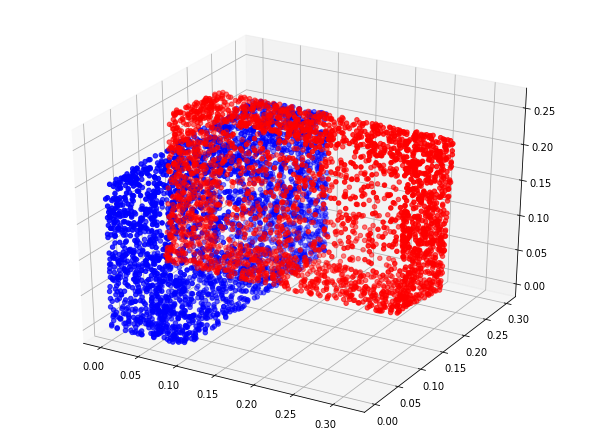

In [57]:
B = randomize_cuboid(0.3, 0.2, 0.1, density=density)

# B = np.copy(A)
t = np.random.rand(dim) * translation
B += t

R = test.rotation_matrix(np.random.rand(dim), np.random.rand() * rotation)
B = np.dot(R, B.T).T

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
ax.scatter(A[:, 0], A[:, 1], A[:, 2], c='b')
ax.scatter(B[:, 0], B[:, 1], B[:, 2], c='r')
# ax.set_axis_off()
plt.show()

In [ ]:
for i in range(50):
  T, distances, iters = icp.icp(B, A, max_iterations=(i+1))

  C = np.ones((density, 4))
  C[:, 0:3] = B
  C = np.dot(T, C.T).T

  fig = plot_both_scatters(A, C)
  fig.savefig('img{}.png'.format(i+100))

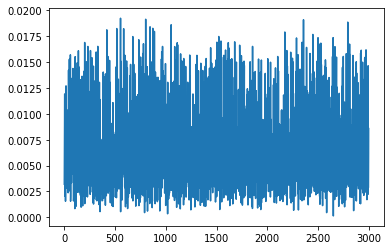

In [61]:
plt.plot(distances)
plt.show()

In [62]:
T

array([[ 0.10546063,  0.99065291, -0.08651514, -0.09853294],
       [-0.99427374,  0.10655469,  0.00811392,  0.2960127 ],
       [ 0.01725667,  0.08516403,  0.99621749, -0.06801185],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [63]:
import cv2
import glob

path = '/content/icp/'

fourcc = cv2.VideoWriter_fourcc(*'XVID')
writer = cv2.VideoWriter('icp.mp4', fourcc, 3, (1152, 648))

i = 100
for filename in os.listdir(path):
  full_path = os.path.join(path, filename)

  img = cv2.imread('img{}.png'.format(i))
  writer.write(img)
  i += 1

writer.release()